In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_pickle('data.pickle')

In [39]:
df.head()

,field1,field2,field3,field4
created_at,,,,
2019-07-18 22:20:00,25.850000,63.000000,27.700000,56.000000
2019-07-18 22:25:00,25.900000,63.000000,27.700000,55.666667
2019-07-18 22:30:00,25.900000,62.000000,27.650000,55.000000
2019-07-18 22:35:00,25.866667,62.333333,27.666667,54.333333
2019-07-18 22:40:00,25.900000,62.000000,27.700000,54.500000


In [56]:
df['time'] = df.index.hour+df.index.minute/60+df.index.second/3600

In [57]:
df.corr()

,field1,field2,field3,field4,time
field1,1.000000,0.590186,0.887882,0.392439,0.123503
field2,0.590186,1.000000,0.544675,0.707384,0.125546
field3,0.887882,0.544675,1.000000,0.249287,0.075247
field4,0.392439,0.707384,0.249287,1.000000,0.232498
time,0.123503,0.125546,0.075247,0.232498,1.000000


In [58]:
df2=pd.DataFrame([])
for col in df.columns:
    for t in range(0,250,25):
        df2[col+'_diff_'+str(t)] = df[col].shift(-t)
print(df2.shape)

(4207, 50)


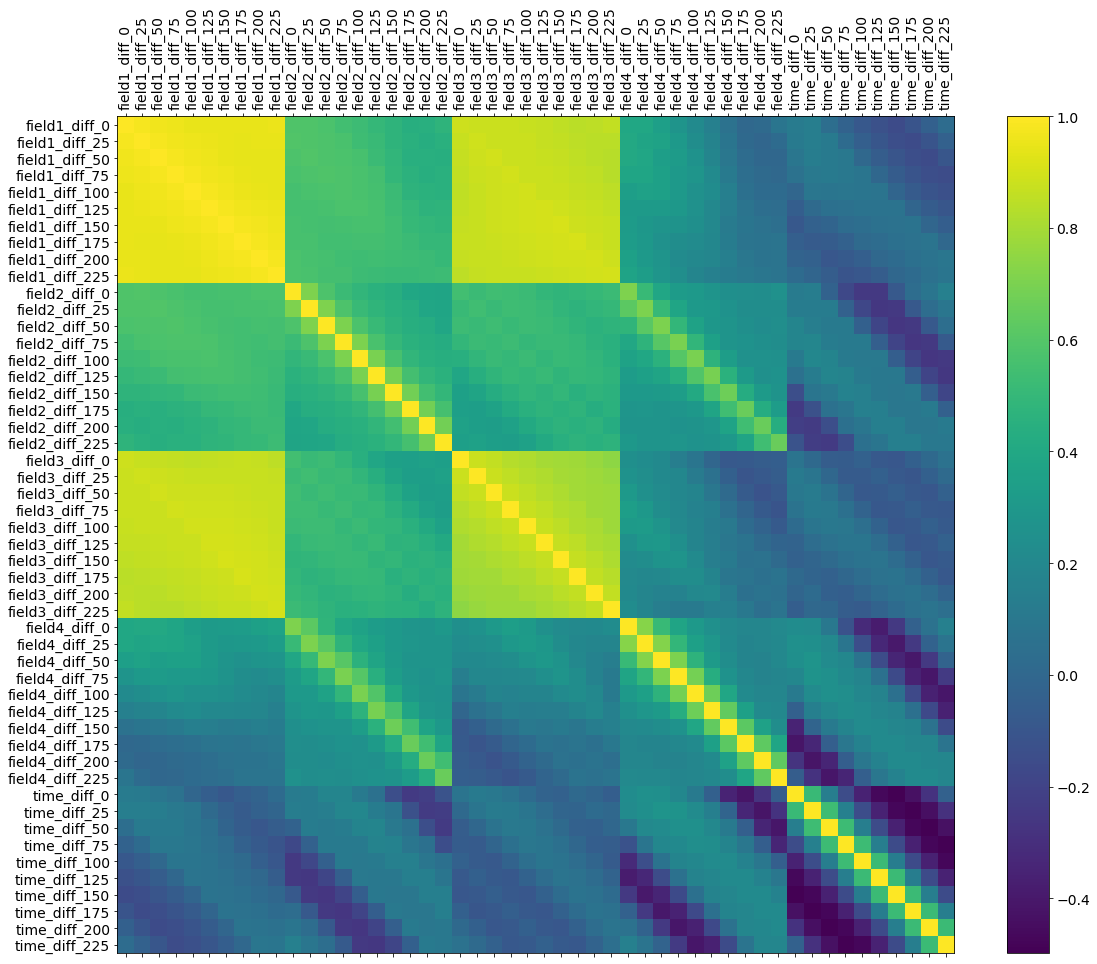

In [59]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=90)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [60]:
df.shape

(4207, 5)

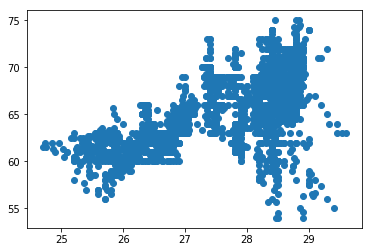

In [61]:
plt.scatter(df.field1,df.field2)

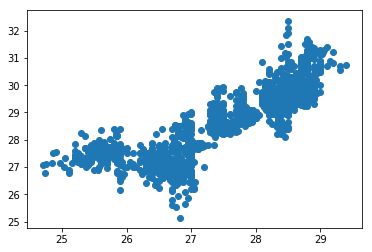

In [62]:
plt.scatter(df.field1,df.field3)

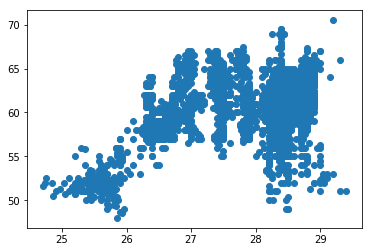

In [63]:
plt.scatter(df.field1,df.field4)

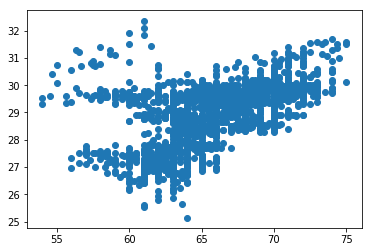

In [64]:
plt.scatter(df.field2,df.field3)

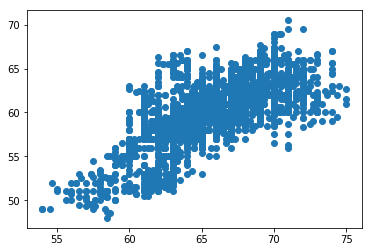

In [65]:
plt.scatter(df.field2,df.field4)

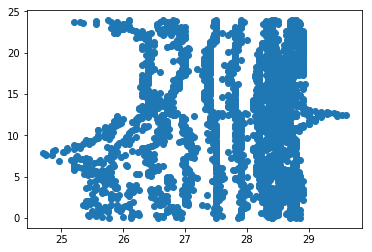

In [68]:
plt.scatter(df.field1,df.time)

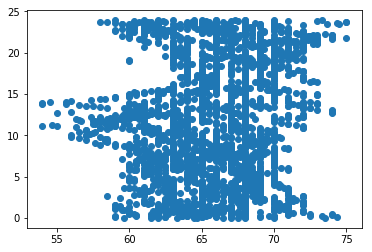

In [69]:
plt.scatter(df.field2,df.time)

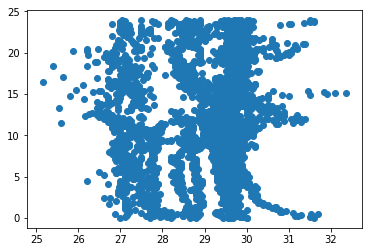

In [70]:
plt.scatter(df.field3,df.time)

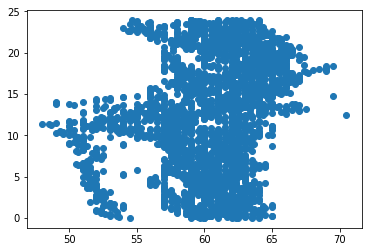

In [71]:
plt.scatter(df.field4,df.time)